In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow import keras

# Reading the Dataset
path = "winequality-red.csv"
red_wine  = pd.read_csv(path)
red_wine .head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# splitting the dataset
df_train = red_wine.sample(frac=0.7)
df_valid = red_wine.drop(df_train.index)

# Normalalization
max = df_train.max(axis=0)
min = df_train.min(axis=0)

df_train = (df_train - min) / (max - min)
df_valid = (df_valid - min) / (max - min)

# Defining features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']
X_train.shape[1]

11

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[11]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model.compile(
    optimizer = "adam",
    loss = "mae"
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.1423 - val_loss: 0.4790
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9836 - val_loss: 0.4447
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9030 - val_loss: 0.4140
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7931 - val_loss: 0.3847
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7454 - val_loss: 0.3586
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6574 - val_loss: 0.3339
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5939 - val_loss: 0.3103
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5416 - val_loss: 0.2874
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4878 - val_loss: 0.2627
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4517 - val_loss: 0.2387
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4178 - val_loss: 0.2136
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3963 - val_lo

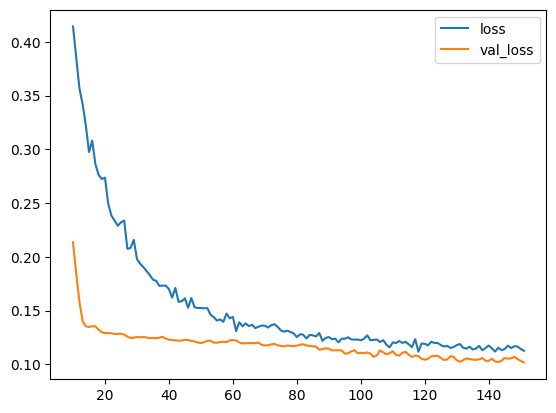

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot();